In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('/content/drive/MyDrive/Netflix.csv', index_col = 0)

In [105]:
df.head()

,High,Low,Close,Adj Close,Volume,Date
Open,,,,,,
1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,5/23/2002
1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,5/24/2002
1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,5/28/2002
1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,5/29/2002
1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,5/30/2002


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5241 entries, 1.156429052 to 310.0599976
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5239 non-null   float64
 1   Low        5239 non-null   float64
 2   Close      5240 non-null   float64
 3   Adj Close  5241 non-null   float64
 4   Volume     5240 non-null   float64
 5   Date       5241 non-null   object 
dtypes: float64(5), object(1)
memory usage: 286.6+ KB


In [107]:
df.describe()

,High,Low,Close,Adj Close,Volume
count,5239.000000,5239.000000,5240.000000,5241.000000,5.240000e+03
mean,124.041337,120.122170,122.113326,122.090193,1.628220e+07
std,170.756922,165.681922,168.253448,168.245728,1.896140e+07
min,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,4.122143,3.950714,4.035714,4.035714,6.178700e+06
50%,31.018572,29.857143,30.430000,30.415714,1.042540e+07
75%,194.490005,187.675003,190.867504,190.850006,1.939578e+07
max,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [108]:
df.isna().sum()

High         2
Low          2
Close        1
Adj Close    0
Volume       1
Date         0
dtype: int64

In [109]:
df1 = df.copy()
df1 = df1.ffill()

In [110]:
df1.isna().sum()

High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

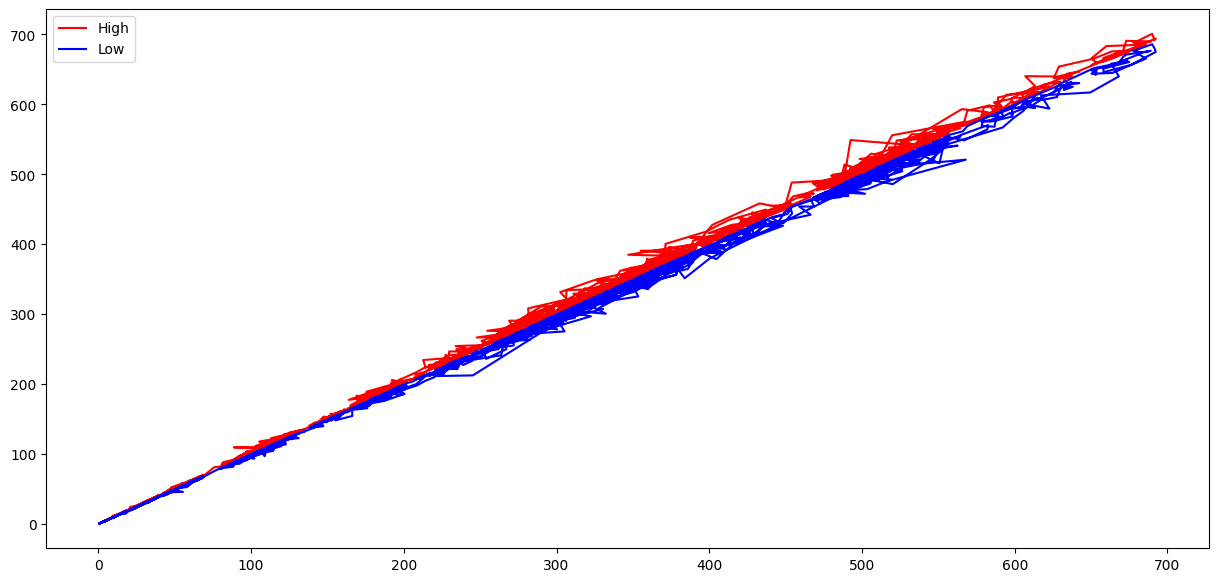

In [111]:
plt.figure(figsize=(15,7))
plt.plot(df['High'], color='r', label = 'High')
plt.plot(df['Low'], color='b', label = 'Low')

plt.legend()
plt.show()

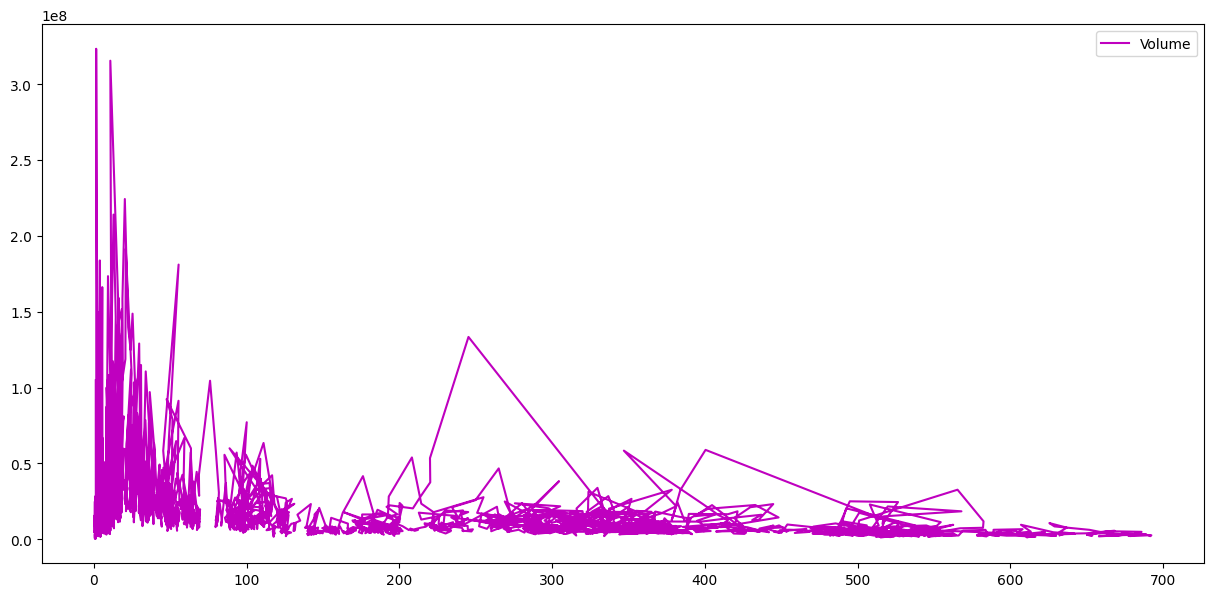

In [115]:
plt.figure(figsize=(15,7))
plt.plot(df['Volume'], color='m', label = 'Volume')
plt.legend()
plt.show()

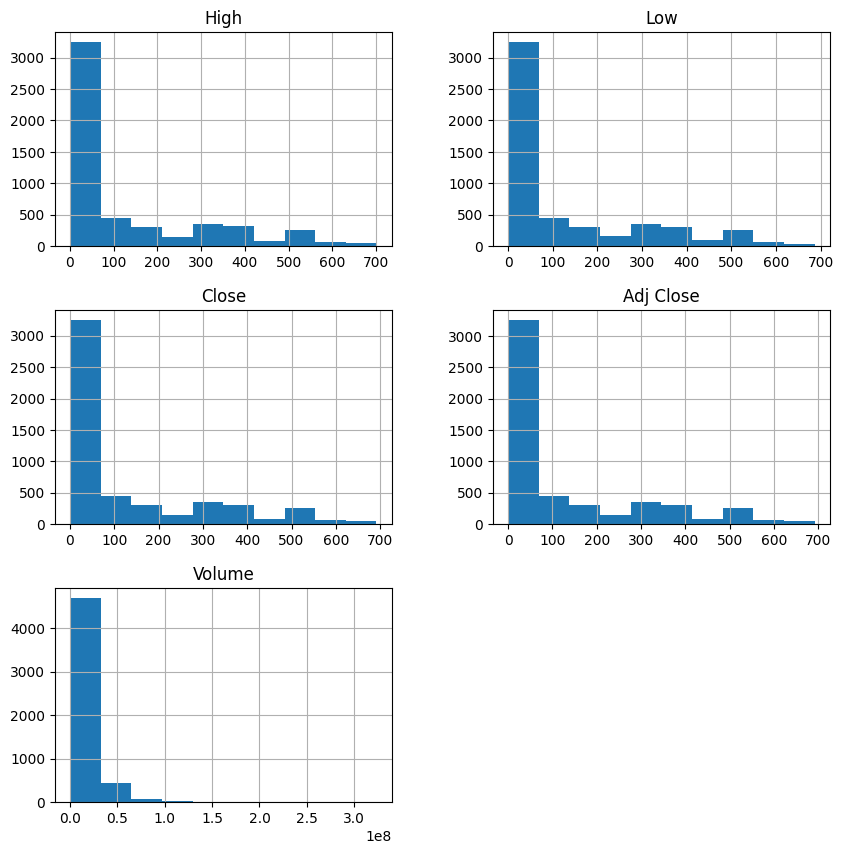

In [116]:
df.hist(figsize=(10, 10))
plt.show()

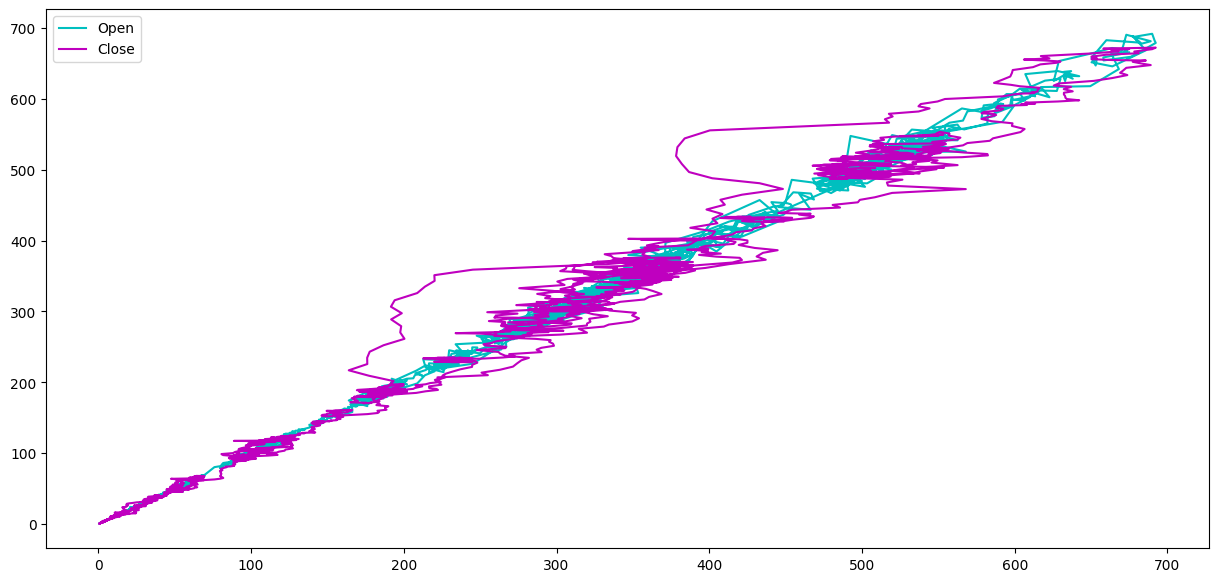

In [117]:
ma = df['Adj Close'].rolling(20).mean()
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], color='c', label = 'Open')
plt.plot(ma, color='m', label = 'Close')
plt.legend()
plt.show()

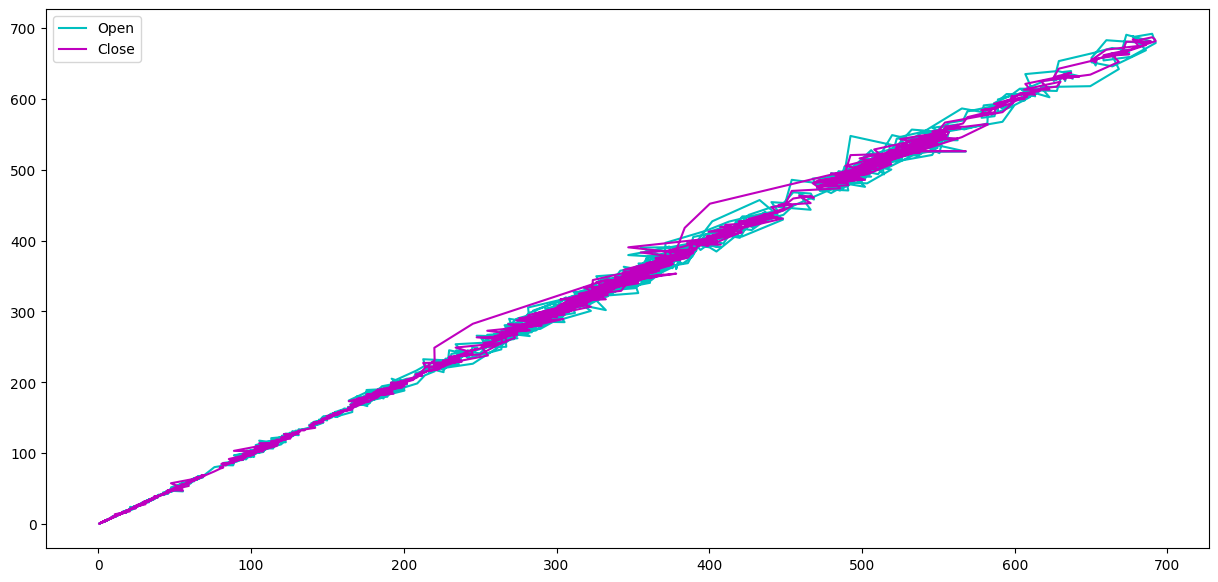

In [118]:
ema = df['Adj Close'].ewm(com=0.9).mean()
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], color='c', label = 'Open')
plt.plot(ema, color='m', label = 'Close')
plt.legend()
plt.show()

In [119]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Adj Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.191392744448107
n_lags: 0.6772873329860044
p-value: 0.6772873329860044
Critial Values:
   1%, -3.431606486780679
Critial Values:
   5%, -2.8620952361461405
Critial Values:
   10%, -2.5670655520388137


In [123]:
df['DD'] = df['Adj Close'].pct_change()

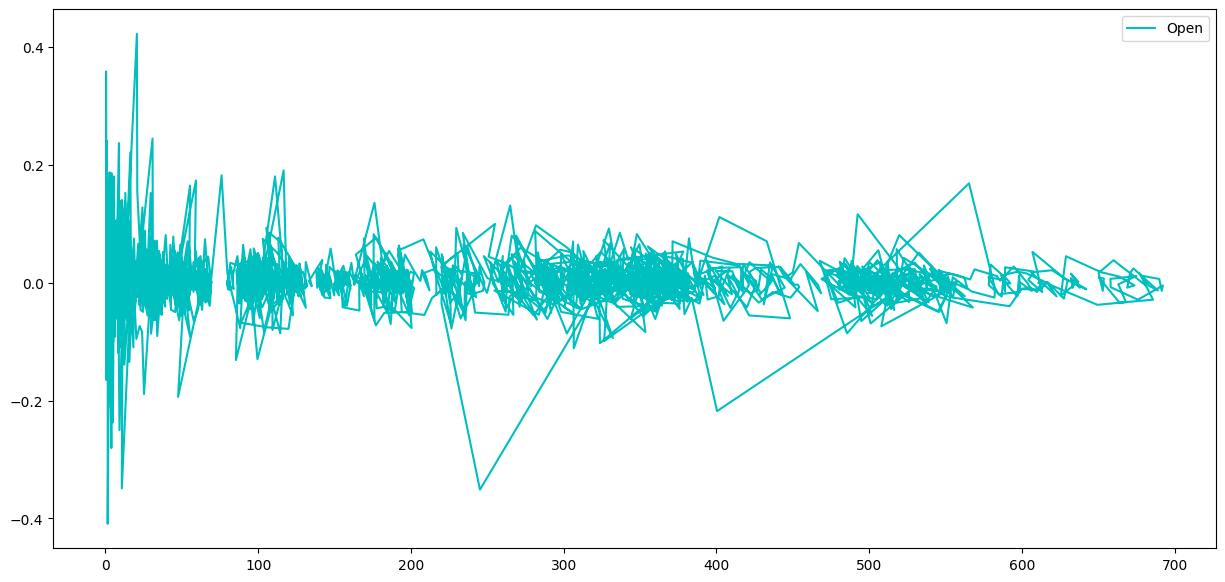

In [124]:
plt.figure(figsize=(15,7))
plt.plot(df['DD'], color='c', label = 'Open')
plt.legend()
plt.show()

Text(0, 0.5, 'DD')

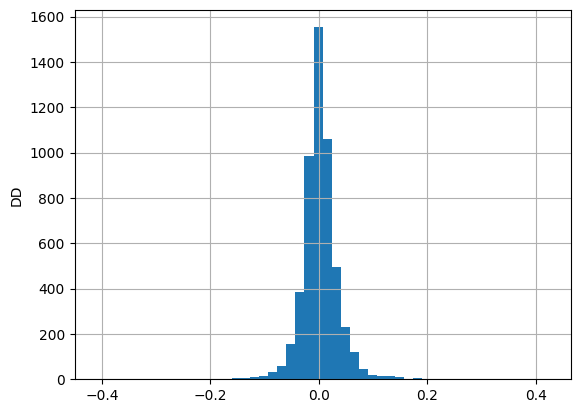

In [125]:
df['DD'].hist(bins=50)
plt.ylabel('DD')

In [126]:
Date = pd.get_dummies(df1['Date'])

In [129]:
df.drop(['Date'], axis = 1, inplace = True)

In [130]:
df = pd.concat([Date], axis = 1)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5241 entries, 1.156429052 to 310.0599976
Columns: 5241 entries, 1/10/2003 to 9/9/2022
dtypes: uint8(5241)
memory usage: 26.2 MB
